In [81]:
# Importing necessary packages
import pandas as pd

# read data as data
data = pd.read_csv('train.csv')

# check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (891, 12)


In [82]:
# show first 5 rows of data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

### Summary of the variables

In [83]:
# summary of all the numerical variable
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
# summary of all the objective variables (including categorical and text)
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [85]:
# import visualization packages
import matplotlib.pyplot as plt

# set up the figure size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

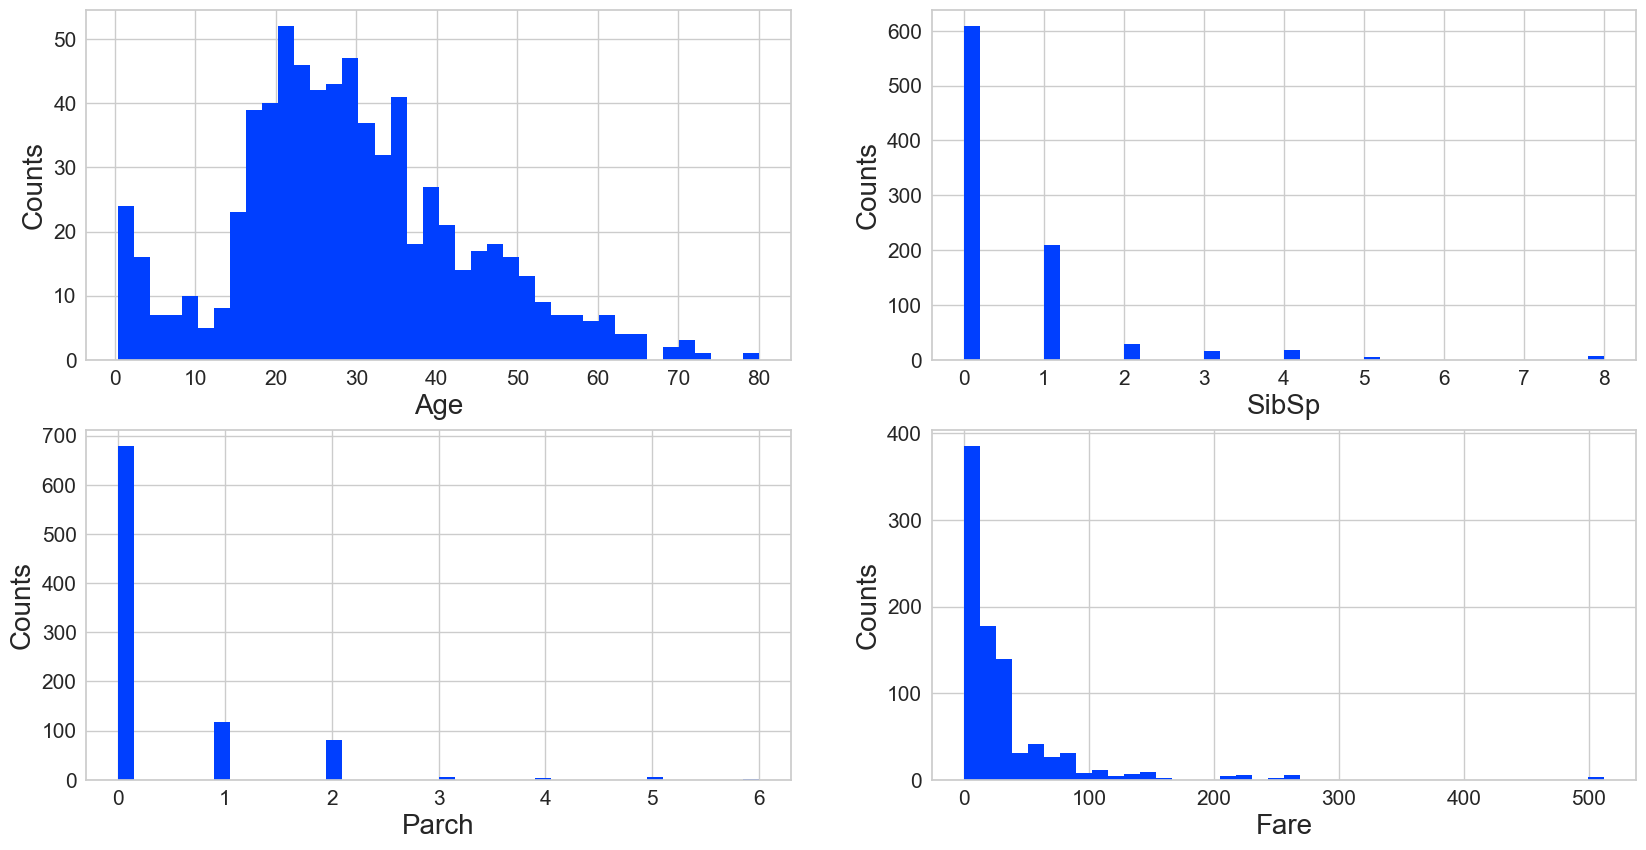

In [86]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols =2)

# specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(),bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both',labelsize=15)


### Barplot for the categorical data

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
Y_Sex = data.groupby('Sex').size().reset_index(name='counts')['Sex']

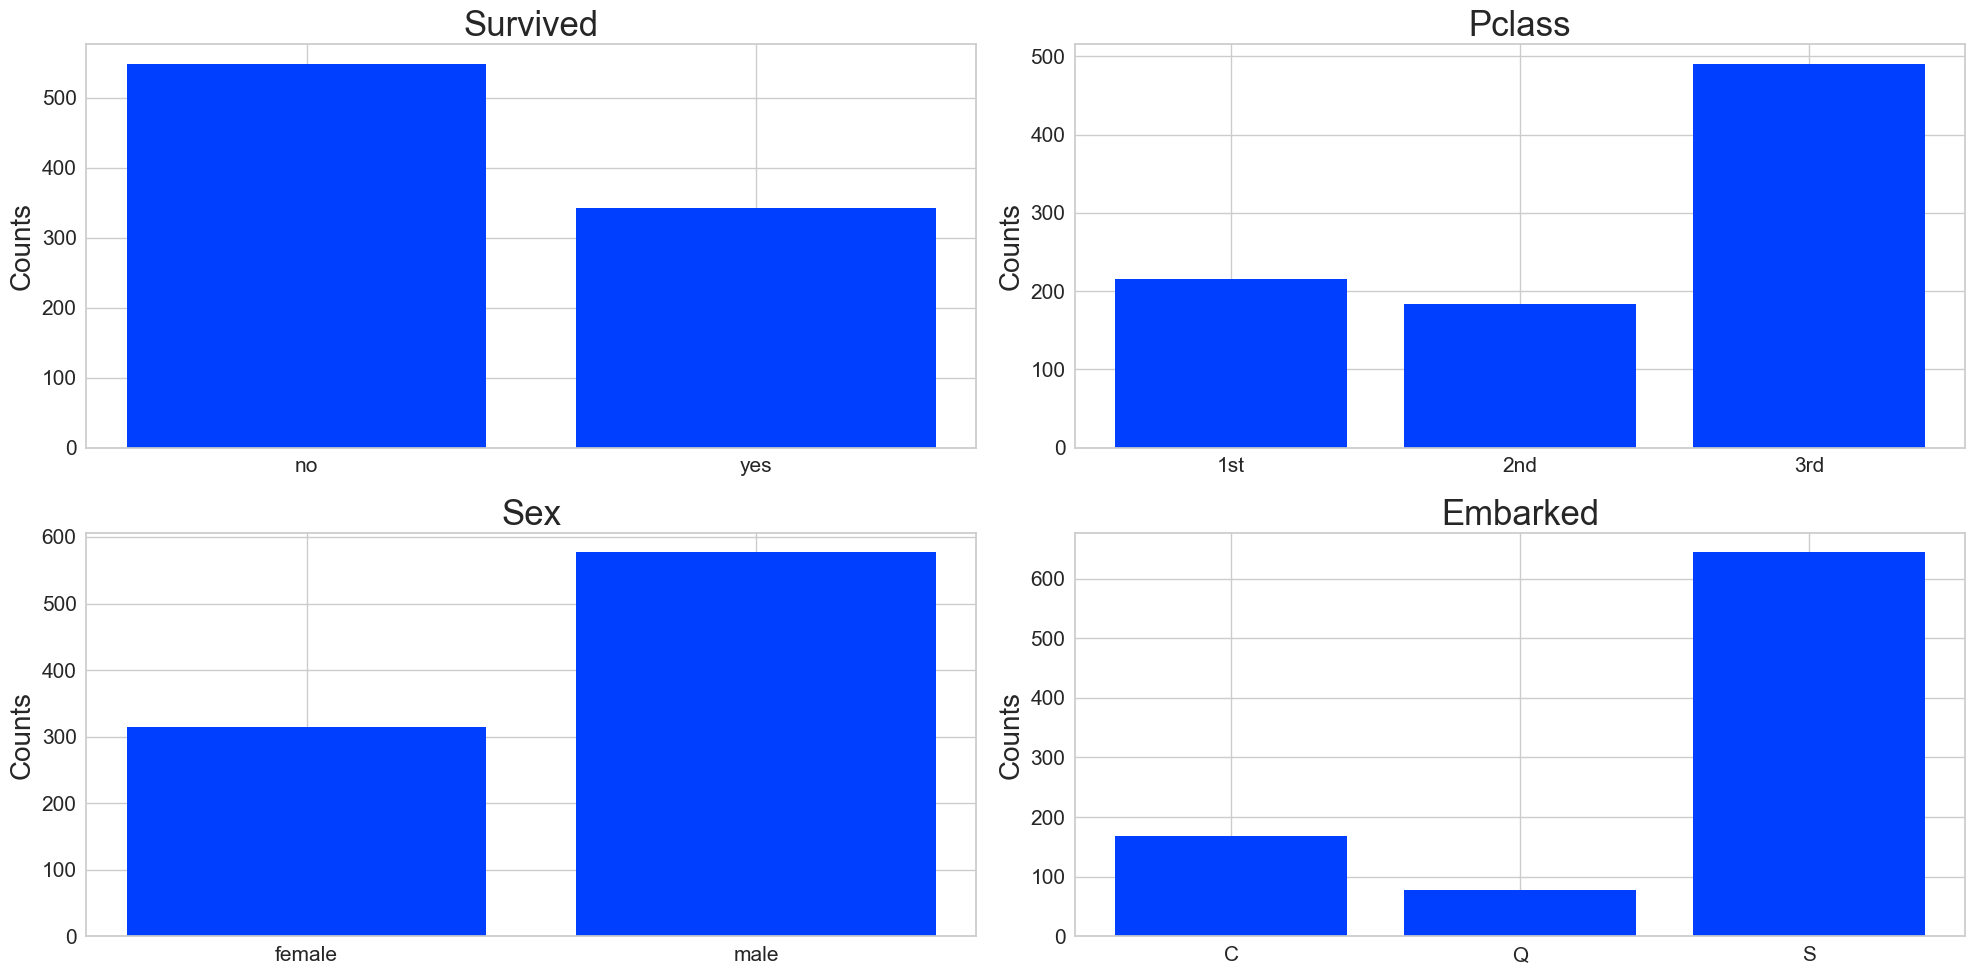

In [89]:
# import matplotlib.pyplot as plt

# set up the figure
# plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# define the plot configuration
plot_config = [
    {
        'column': 'Survived',
        'title': 'Survived',
        'mapping': {1: 'yes', 0: 'no'},
        'axes': axes[0, 0]       
    },
    {
        'column': 'Pclass',
        'title': 'Pclass',
        'mapping': {1: '1st', 2: '2nd', 3: '3rd'},
        'axes': axes[0, 1]
    },
    {
        'column': 'Sex',
        'title': 'Sex',
        'mapping': None,
        'axes': axes[1, 0]
    },
    {
        'column': 'Embarked',
        'title': 'Embarked',
        'mapping': None,
        'axes': axes[1, 1]
    }
]

# loop thorugh each config and plot
for cfg in plot_config:
    col = cfg['column']
    ax = cfg['axes']
    
    if cfg['mapping']:
        data_plot = data.replace({col: cfg['mapping']})
    else:
        data_plot = data.copy()
    
    grouped = data_plot.groupby(col).size().reset_index(name='Counts')
    ax.bar(grouped[col], grouped['Counts'])
    ax.set_title(cfg['title'], fontsize=25)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.tight_layout()
    

### 2. Are the numerical variables correlated

In [90]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


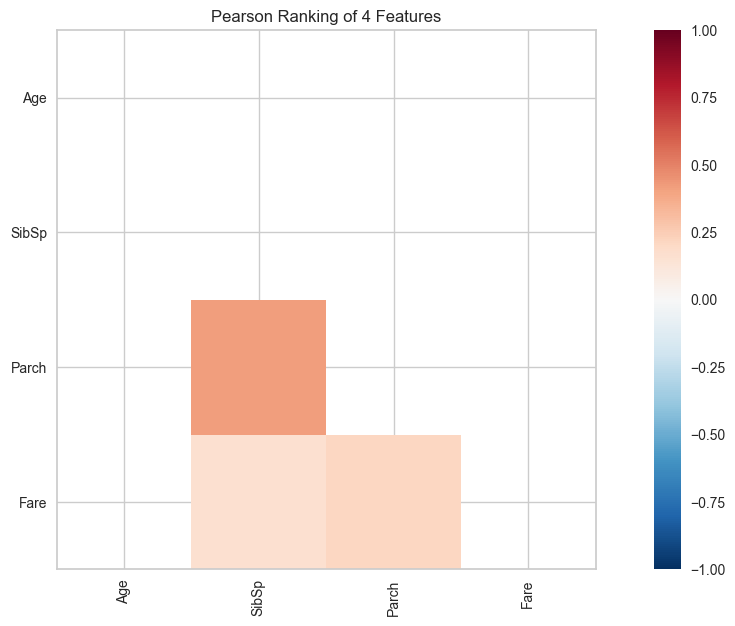

<Axes: title={'center': 'Pearson Ranking of 4 Features'}>

In [91]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visualization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].values

# instantiate the visualizer with the covariance ranking algorothm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                   # Fit the datd to the visualizer
visualizer.transform(X)              #Transform the data
visualizer.show()                    #show the data

### Is the distribution of numerical variables the same or different among survived and not survived?

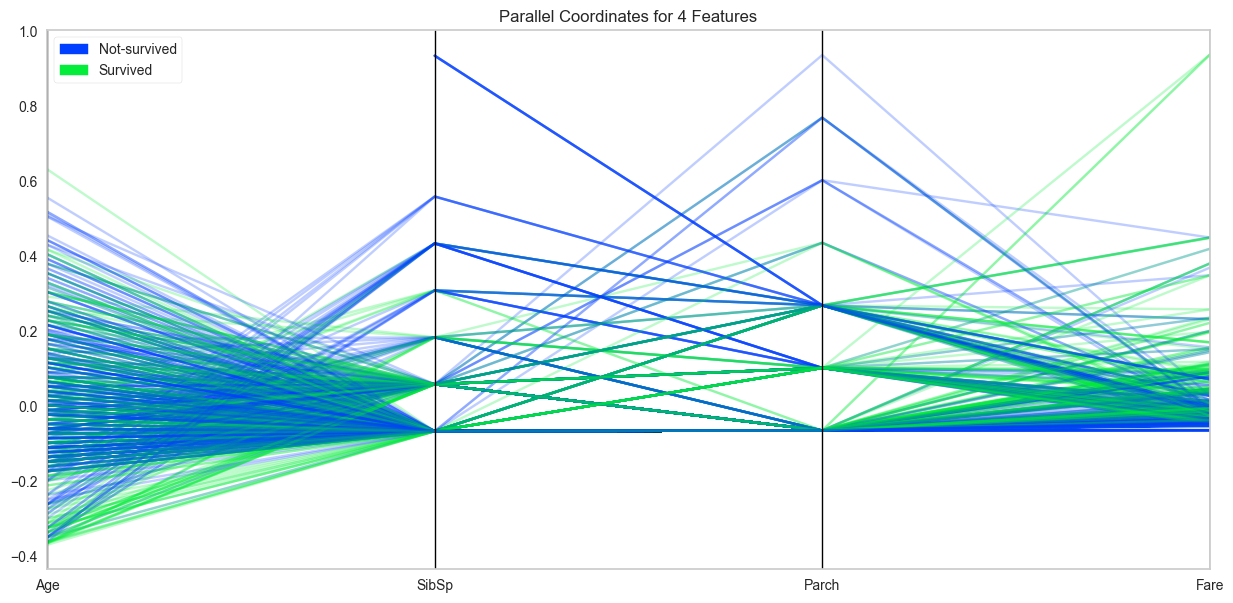

<Axes: title={'center': 'Parallel Coordinates for 4 Features'}>

In [92]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for the yellowbrick viusalizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()
# normalize the data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

#     Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Survived.values

# instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

We can see from the figure that lots of passengers with more siblings on the boat have a higher death rate. Passengers paid a higher fare survived more.

### Are there different survival rates in different categories

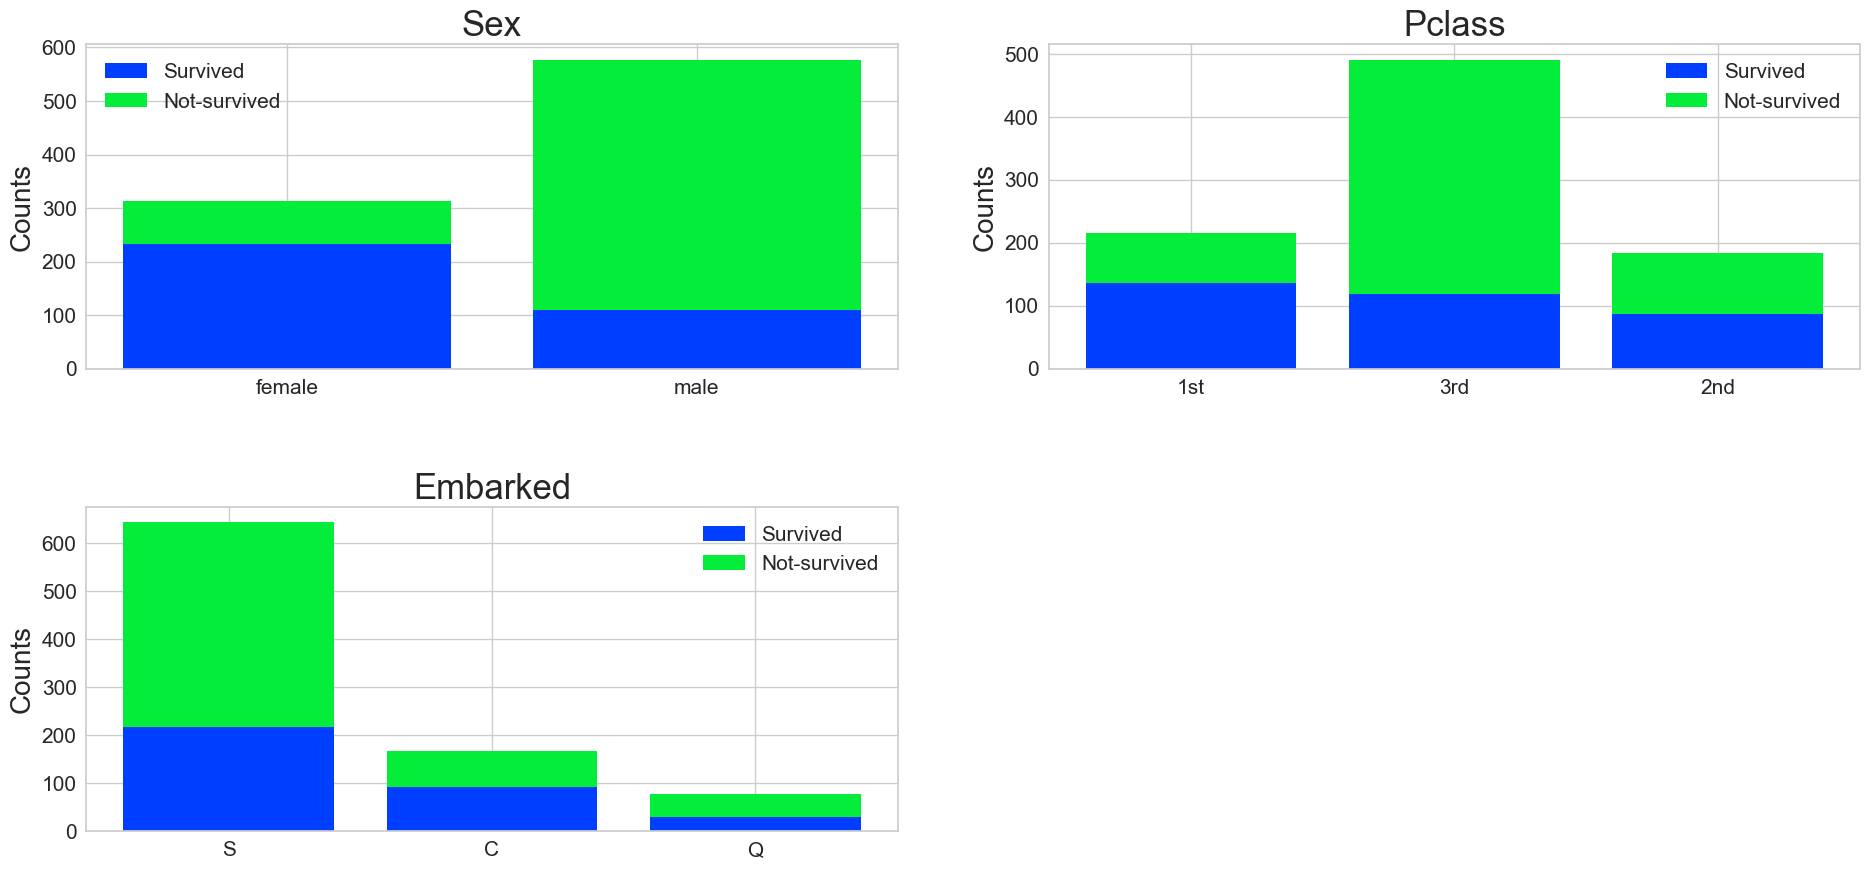

In [93]:
# import matplotlib.pyplot as plt

# Ensure inline display for Jupyter
# %matplotlib inline

# Set up figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Cleaned and mapped data once
data_cleaned = data.copy()
data_cleaned['Survived'] = data_cleaned['Survived'].map({1: 'Survived', 0: 'Not-survived'})
data_cleaned['Pclass'] = data_cleaned['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})

# Define variables to plot and their subplot positions
variables = ['Sex', 'Pclass', 'Embarked']
positions = [(0, 0), (0, 1), (1, 0)]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Plotting loop
for var, pos in zip(variables, positions):
    ax = axes[pos]
    
    survived_counts = data_cleaned[data_cleaned['Survived'] == 'Survived'][var].value_counts()
    not_survived_counts = data_cleaned[data_cleaned['Survived'] == 'Not-survived'][var].value_counts()
    not_survived_counts = not_survived_counts.reindex(survived_counts.index, fill_value=0)

    p1 = ax.bar(survived_counts.index, survived_counts.values)
    p2 = ax.bar(not_survived_counts.index, not_survived_counts.values, bottom=survived_counts.values)

    ax.set_title(var, fontsize=25)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize=15)

# Optionally remove the unused subplot
fig.delaxes(axes[1, 1])  # Since only 3 plots are used

plt.tight_layout()
plt.show()



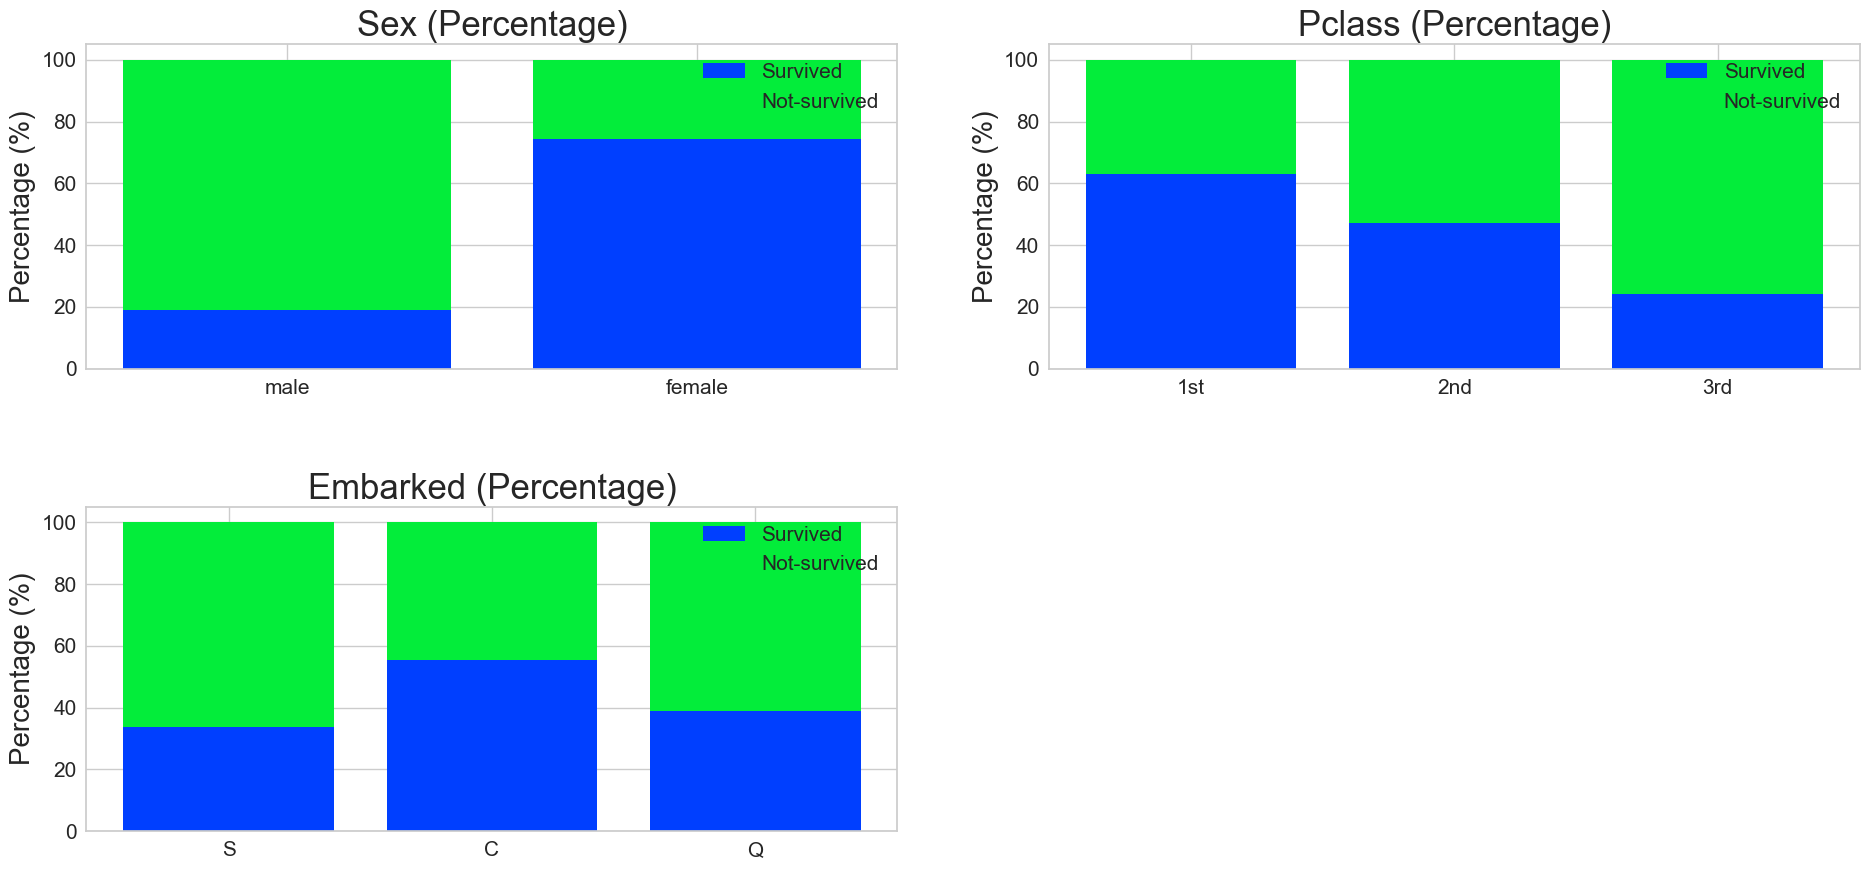

In [94]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# Clean and map data once
data_cleaned = data.copy()
data_cleaned['Survived'] = data_cleaned['Survived'].map({1: 'Survived', 0: 'Not-survived'})
data_cleaned['Pclass'] = data_cleaned['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})

# Plotting config
variables = ['Sex', 'Pclass', 'Embarked']
positions = [(0, 0), (0, 1), (1, 0)]
custom_orders = {
    'Sex': ['male', 'female'],
    'Pclass': ['1st', '2nd', '3rd'],
    'Embarked': ['S', 'C', 'Q']  # Adjust based on data
}

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Loop over variables
for var, pos in zip(variables, positions):
    ax = axes[pos]
    order = custom_orders[var]

    # Get counts
    survived = data_cleaned[data_cleaned['Survived'] == 'Survived'][var].value_counts().reindex(order, fill_value=0)
    not_survived = data_cleaned[data_cleaned['Survived'] == 'Not-survived'][var].value_counts().reindex(order, fill_value=0)

    # Compute percentages
    total = survived + not_survived
    survived_pct = (survived / total * 100).fillna(0)
    not_survived_pct = (not_survived / total * 100).fillna(0)

    # Plot
    p1 = ax.bar(order, survived_pct.values, label='Survived')
    p2 = ax.bar(order, not_survived_pct.values, bottom=survived_pct.values, label='Not-survived')

    # Labels and style
    ax.set_title(f'{var} (Percentage)', fontsize=25)
    ax.set_ylabel('Percentage (%)', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(fontsize=15)

# Remove empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


As we can see from upper figures, there are more female survived. And the death rate in the 3rd ticket class and the embarkation from Southampton port is much higher than the others.

### Feature Selection and Feature Engineering

We will delete the features **"PassengerId", "Name", "Ticket"** and **"Cabin"** from our model. The reasons are as follows:

- "PassengerId": just a serires of numbers from 1 - 891 which is used to label each person.
- "Name": the names of all the passengers, which might give some information like if there are some people are related based on the last names. But to simplify things up at this stage, I will pass this feature.
- "Ticket" and "Cabin": too many levels with unknown information.

#### Filling in Missing Values

From EDA, we know there are some missing value in "Age", "Cabin" and "Embarked" variables. Since we are not going to use "Cabin" feature, we will just fill "Age" and "Embarked". I will fill the missing value in "Age" using the median age and fill the missing value in "Embarked" with "S" since there are only 2 values missing and "S" is the most represent in the dataset.

In [95]:
#fill the missing values in the Age column with the medeian value
data['Age'] = data['Age'].fillna(data['Age'].median())

# check result
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [96]:
# filling with the most represented value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# check result
data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

#### Log Transformation of "Fare"

Log-transformation of the "Fare"
From the histograms, we can see that the distribution of "Fare" is highly right-skewed. For dealing with highly-skewed positive data, one of the strategies that can be used is log-transformation, so the skewness will be less. Since the minimum is 0, we will add 1 to the raw value, so there will not be any errors when using log-transformation.

In [97]:
# Import package
import numpy as np

# log transformation of the Fare column
def add_log_column(df, col):
    df[f'{col}_log1p'] = np.log1p(df[col])

# apply the function to the Fare column
add_log_column(data, 'Fare')

# check the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


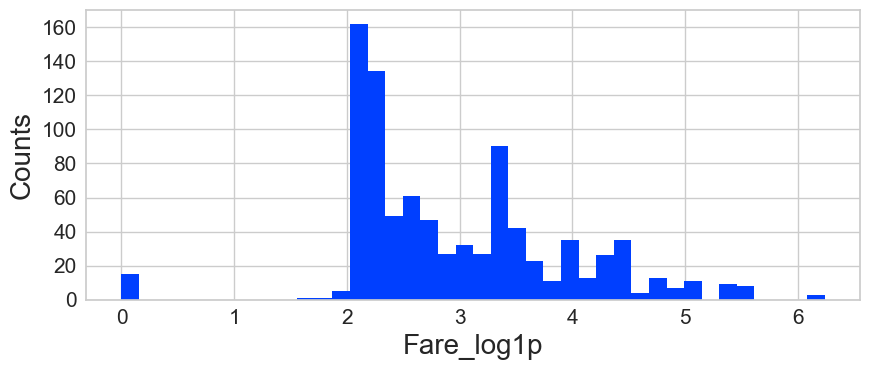

In [98]:
# check the distribution of the Fare_log1p column
data['Fare_log1p'].plot.hist(bins=40, figsize=(10, 5))
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

#### One Hot Encoding for the Categorical Features

In [99]:
# One-Hot Encoding is a method for converting categorical variables into a format that machine learning algorithms can understand (numerical form).
# It creates binary columns for each category in the categorical variable.
data_cat_dummies = pd.get_dummies(
    data[['Pclass', 'Sex', 'Embarked']].replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}),
    prefix=['Pclass', 'Sex', 'Embarked']
).astype(int)

# check the result
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


### Model Training and Model Evaluation
#### Prepare data for the model training and Evaluation
Before we train the model, we will need to split the data into 2 sets: training and validation. We will use the training dataset to train the model and use the validation dataset to evaluate the model.

In [100]:
# Select numerical features
num_features = ['Age', 'SibSp', 'Parch', 'Fare_log1p']  

# Combine numerical features with one-hot encoded categorical features
data_model_X = pd.concat([data[num_features], data_cat_dummies], axis=1)

# Check the final model data
data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1


In [101]:
# Map the target labels for readability
data_model_y = data['Survived'].map({1: 'Survived', 0: 'Not-survived'})

# Preview the target variable
data_model_y.head()

0    Not-survived
1        Survived
2        Survived
3        Survived
4    Not-survived
Name: Survived, dtype: object

In [102]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    data_model_X, 
    data_model_y, 
    test_size=0.3, 
    random_state=11
)

# Display the number of samples in each set
print("Number of samples in training set:", len(X_train))
print("Number of samples in validation set:", len(X_val))

# Show class distribution in training set
print("\nClass distribution in training set:")
print(y_train.value_counts())

# Show class distribution in validation set
print("\nClass distribution in validation set:")
print(y_val.value_counts())

Number of samples in training set: 623
Number of samples in validation set: 268

Class distribution in training set:
Survived
Not-survived    373
Survived        250
Name: count, dtype: int64

Class distribution in validation set:
Survived
Not-survived    176
Survived         92
Name: count, dtype: int64


#### Model Training and Evaluation Visualization using yellowbrick
The objective of this project is to predict whether a passenger survived the Titanic disaster or not. This is a classification problem, and there are various algorithms that can be applied to build a classification model. In this case, I will use logistic regression for the task.

##### Confusion Matrix

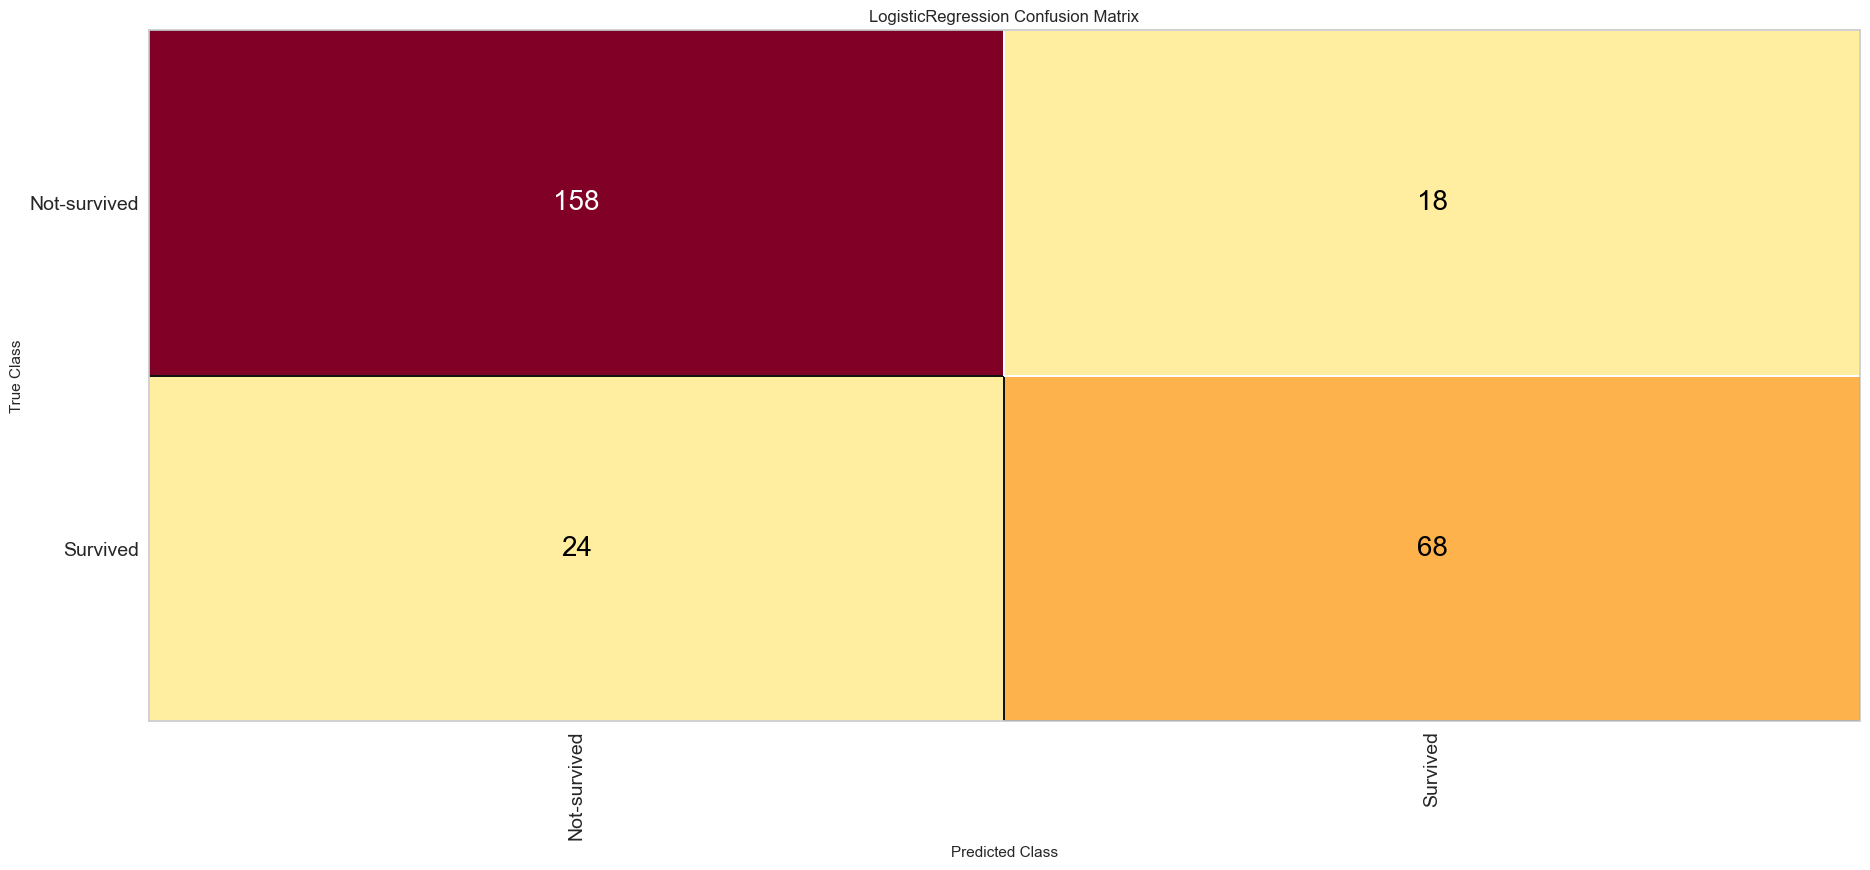

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [103]:
# Import necessary packages
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC

# Instantiate the logistic regression model
model = LogisticRegression(max_iter=1000)

# Create a confusion matrix visualizer with class labels
classes = ['Not-survived', 'Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model to the training data
cm.fit(X_train, y_train)


# Evaluate the model on the validation data
cm.score(X_val, y_val)

# Adjust label font size in the confusion matrix
for label in cm.ax.texts:
    label.set_size(20)

cm.ax.tick_params(labelsize=14)  # controls axis tick labels


# Show the confusion matrix
cm.show()

In [104]:
# Calculating accuracy on the validation set
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, model.predict(X_val))
print(f"Validation Accuracy: {accuracy:.2%}")


Validation Accuracy: 84.33%


As we can see from the confusion matrix, the accuracy of the model is (158+68) / (158+24+18+68) = 84.33%. It's much higher than random guess, which is 50.00%. If you use majority guess, the accuracy will be a little higher which is 176/268 = 65.67%, but still lower than our model. It seems like our model worked pretty well which means we should use a machine learning model to predict who survived in this instance.

#### Precision, Recall, and F1-Score

In [108]:
from sklearn.metrics import classification_report

#  Predict and print metrics safely to console
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, zero_division=0))



              precision    recall  f1-score   support

Not-survived       0.87      0.90      0.88       176
    Survived       0.79      0.74      0.76        92

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



C:\Users\HomePC\AppData\Roaming\Python\Python311\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


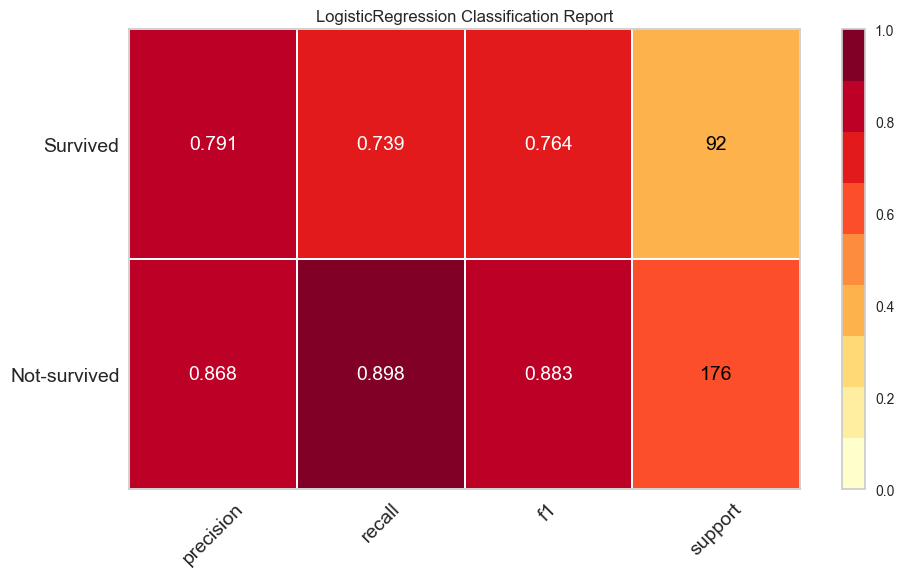

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:

# Remap y_train and y_val to binary
y_train_bin = y_train.map({'Not-survived': 0, 'Survived': 1})
y_val_bin   = y_val.map({'Not-survived': 0, 'Survived': 1})

# Re-instantiate and fit model on numeric labels
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_bin)

# Create and display the classification report visualizer
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 14})
cr_viz = ClassificationReport(model, classes=['Not-survived', 'Survived'], support=True)
cr_viz.score(X_val, y_val_bin)
cr_viz.show()

The precision, recall, and F1 score result further confirmed that the model is relatively good.

#### ROC curve and AUC

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


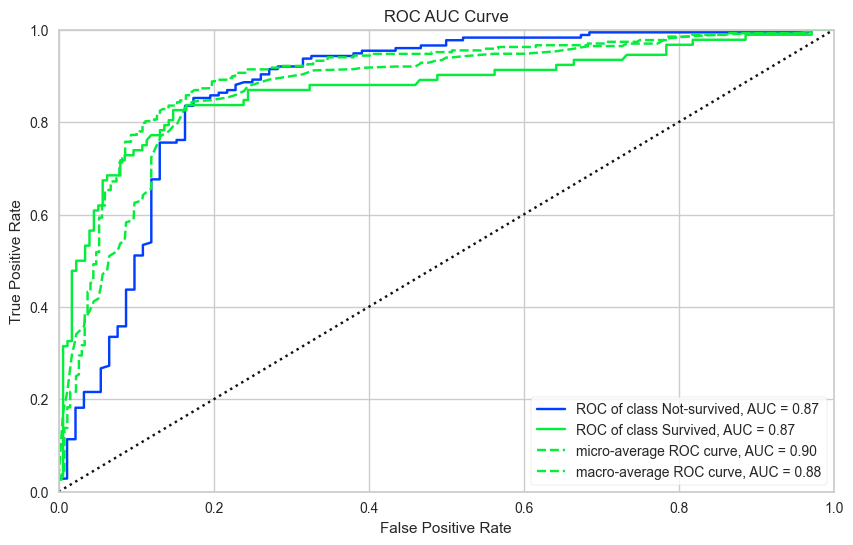

<Axes: title={'center': 'ROC AUC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [111]:

roc_viz = ROCAUC(model, classes=classes, title="ROC AUC Curve")
roc_viz.fit(X_train, y_train_bin)
roc_viz.score(X_val, y_val_bin)
roc_viz.show()

The ROC curve is also another way to show how good the model is. The doted diagonal line in the pictures shows when the result is randomly guessed. A good model should be above that line.

### 🔚 Generate Kaggle Submission File


In [113]:
# load the test data
test = pd.read_csv('test.csv')

# --- Preprocessing the test data ---
# Fill missing values 
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# Log transformation of the Fare column
test['Fare_log1p'] = np.log1p(test['Fare'])

# One-Hot Encoding for categorical variables
test_cat_dummies = pd.get_dummies(
    test[['Pclass', 'Sex', 'Embarked']].replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}),
    prefix=['Pclass', 'Sex', 'Embarked']
).astype(int)

# Ensure the test dummies match the training dummies
missing_cols = set(data_cat_dummies.columns) - set(test_cat_dummies.columns)
for col in missing_cols:
    test_cat_dummies[col] = 0

# Align column order with training set
test_cat_dummies = test_cat_dummies[data_cat_dummies.columns]

# Combine numerical and categorical features
test_model_X = pd.concat([test[['Age', 'SibSp', 'Parch', 'Fare_log1p']], test_cat_dummies], axis=1)

# --- Predicting using trained model ---
# train the model on the full training data
data_model_y = data['Survived']
model.fit(data_model_X, data_model_y)

# Make predictions on the test set
predictions = model.predict(test_model_X)

# --- Create submission DataFrame ---
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")
# Display the first few rows of the submission DataFrame
print(submission.head())

Submission file created successfully!
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


### 🧾 Conclusion

In this notebook, I developed and evaluated a classification model to predict Titanic passenger survival based on demographic and ticket-related features. The project followed a structured machine learning workflow, including:

- 🔹 **Data cleaning**: Handling missing values for age, fare, and embarked port.
- 🔹 **Feature engineering**: Applied log transformation to skewed numerical data (`Fare_log1p`), and performed one-hot encoding for categorical variables (`Pclass`, `Sex`, `Embarked`).
- 🔹 **Modeling**: Built a **Logistic Regression model**, selected for its simplicity and interpretability, and trained it using selected numerical and categorical features.
- 🔹 **Evaluation**: Used Yellowbrick visualizers to assess:
  - Classification performance via **precision, recall, and F1-score**
  - Model separation capability using the **ROC AUC Curve**
  - Confusion matrix for class distribution understanding
- 🔹 **Submission generation**: Preprocessed the test dataset in line with the training process, made predictions using the final model, and exported the results in Kaggle’s required format.

Overall, the model showed reasonable ability to distinguish between survivors and non-survivors, especially given the class imbalance. While Logistic Regression offers a solid baseline, future improvements could involve exploring more advanced models (e.g., Random Forest, Gradient Boosting), feature selection, or hyperparameter tuning.

This project not only demonstrated end-to-end binary classification but also emphasized the importance of **data preprocessing**, **evaluation beyond accuracy**, and **consistent pipeline application** to unseen data.
